# MNIST Digits Classification

## Import Libraries

In [131]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

import tensorflow as tf
import numpy as np

## Splitting the Data

In [132]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [134]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [135]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [136]:
y_train[0]

5

In [137]:
y_test[0]

7

## Data Visualisation

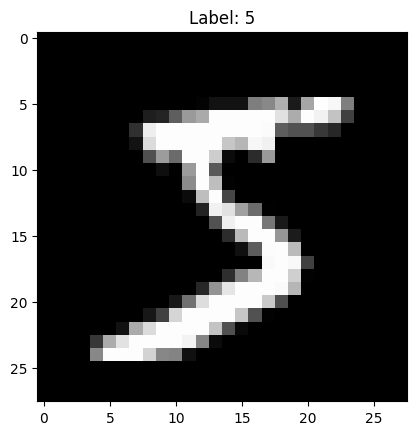

In [138]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

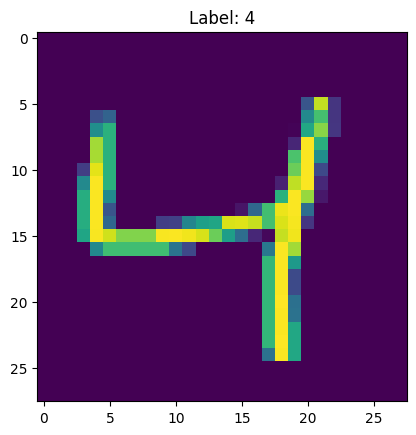

In [139]:
plt.imshow(X_train[2])
plt.title(f"Label: {y_train[2]}")
plt.show()

## Data Normalisation

In [140]:
X_train_scaled, X_test_scaled = X_train / 255, X_test / 255
# pixel values now to a range of [0, 1]

In [141]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flatten Images

In [142]:
X_train_flattened = X_train_scaled.reshape(-1, 28 * 28) 
X_test_flattened = X_test_scaled.reshape(-1, 28 * 28)

# flatten images from 28 x 28 matrices to a 784 vector
# dense neural network only works with one dimensional data

In [143]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [144]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [145]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Model Architecture

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)), # 28 x 28 single vector
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 10 classes - single label classification
])

In [147]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.summary()

# sparse_categorical_crossentropy since one hot encoding is not done
# labels are just integer values y_train[0]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [148]:
history = model.fit(X_train_flattened, y_train, epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8950 - val_loss: 0.1947 - val_accuracy: 0.9418
Epoch 2/25
375/375 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9519 - val_loss: 0.1402 - val_accuracy: 0.9591
Epoch 3/25
375/375 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9667 - val_loss: 0.1185 - val_accuracy: 0.9647
Epoch 4/25
375/375 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9744 - val_loss: 0.1141 - val_accuracy: 0.9653
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9793 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 6/25
375/375 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9835 - val_loss: 0.0916 - val_accuracy: 0.9727
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0908 - val_accuracy: 0.9751
Epoch 

## Model Evaluation

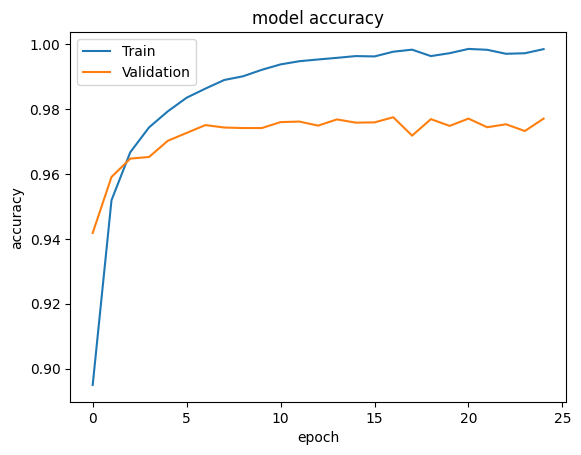

In [149]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

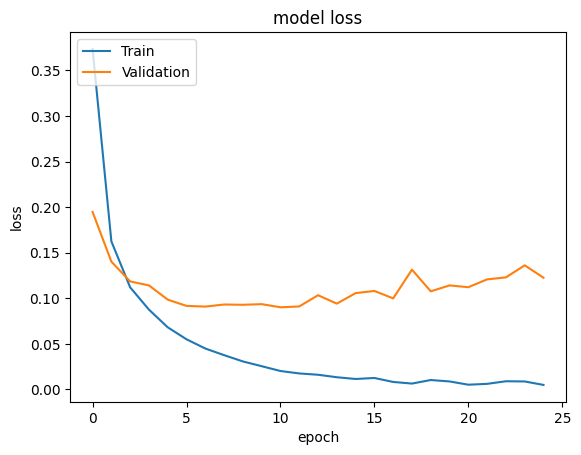

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [151]:
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9784
Test loss: 0.1090
Test accuracy: 0.9784


## Model Prediction

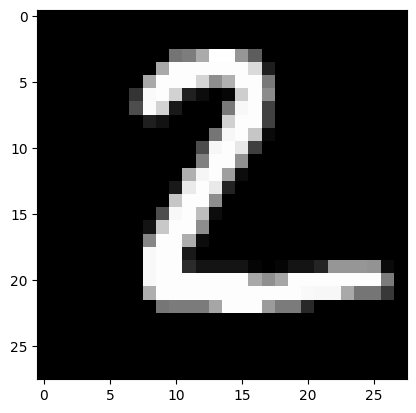

In [156]:
plt.imshow(X_test[1], cmap='gray')

In [157]:
y_preds = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [159]:
print(y_preds[1])
print(np.argmax(y_preds[1]))

[2.0108591e-16 8.7198564e-13 1.0000000e+00 2.2497214e-11 7.5839701e-27
 1.6650960e-17 1.2768378e-19 3.7389493e-17 2.2268876e-13 2.3650067e-26]
2


## References

1. MNIST Handwritten Digit Classification - Deep Learning with Tensorflow | Ep. 10
    - https://www.youtube.com/watch?v=OCU7-5LdPhY

2. Neural Network For Handwritten Digits Classification | Deep Learning Tutorial 7 (Tensorflow2.0)
    - https://www.youtube.com/watch?v=iqQgED9vV7k&t=1503s